In [5]:
import ot
import ot.plot
import ot.bregman
import ot.lp
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
from IPython.display import display, clear_output

In [103]:
n_values = 50
n_bids = 50
values = np.linspace(0,1,n_values)
bids = np.linspace(0,1,n_bids)

#n_values = 2
#n_bids = 2
#values = np.array([0.25, 0.75])
#bids = np.array([0.25, 0.75])

In [104]:
def compute_bid_distribution(X):
    bid_density = np.sum(X, axis = 0)
    return np.cumsum(bid_density) - 0.5 * bid_density

def utility_matrix(bid_distribution):
    A = values[:,None]*bid_distribution
    #print(f'A: {A}')
    B = np.transpose(np.tile((bid_distribution*bids)[:,None], (1,n_bids)))
    #print(f'B: {B}')
    return A-B

def weighted_utility(X, utility_matrix):
    return np.sum(X * utility_matrix, axis = 1)

def update_factor(utility_matrix, weighted_utility):
    return (1./n_values)*utility_matrix - weighted_utility[:,None]

def update_x(X, update_factor, epsilon):
    Y = X + epsilon*update_factor
    Y = np.maximum(Y, np.zeros_like(Y))
    rowsums = np.sum(Y, axis=1)
    scaling = 1./(n_values*rowsums)
    return scaling[:,None] * Y

In [121]:
X_1 = np.zeros((n_values,n_bids))
X_2 = np.zeros((n_values,n_bids))

for i in range(n_values):
    X_1[i,0] = 1./n_values
    X_2[i,n_bids-1] = 1./n_values

In [ ]:
X_1 = np.ones((n_values,n_bids))/(n_values*n_bids)
X_2 = np.ones((n_values,n_bids))/(n_values*n_bids)

100%|██████████| 100/100 [00:00<00:00, 2638.59it/s]

0.02
0.0004
0.0


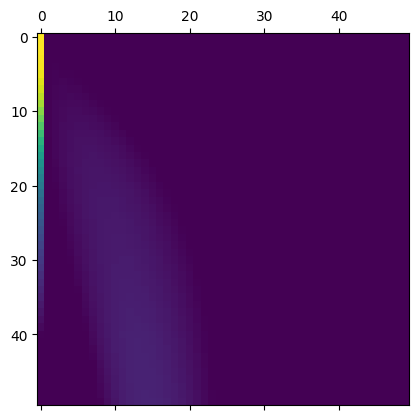

In [122]:
epsilon = 0.01
n_iterations = 100


for i in tqdm(range(n_iterations)):
    bid_distribution_1 = compute_bid_distribution(X_1)
    bid_distribution_2 = compute_bid_distribution(X_2)
    utility_matrix_1 = utility_matrix(bid_distribution_2)
    #print(f'utility_matrix: {utility_matrix_1}')
    utility_matrix_2 = utility_matrix(bid_distribution_1)
    weighted_utility_1 = weighted_utility(X_1, utility_matrix_1)
    #print(f'weighted_utility: {weighted_utility_1}')
    weighted_utility_2 = weighted_utility(X_2, utility_matrix_2)
    update_factor_1 = update_factor(utility_matrix_1, weighted_utility_1)
    #print(f'update factor: {update_factor_1}')
    update_factor_2 = update_factor(utility_matrix_2, weighted_utility_2)
    X_1 = update_x(X_1, update_factor_1, epsilon)
    X_2 = update_x(X_2, update_factor_2, epsilon)

print(X_1.max())
print(X_1.mean())
print(X_1.min())
plt.matshow(X_1)